Задание 1
Импортируйте библиотеки pandas и numpy.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.
Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.
Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.
Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.


In [1]:
#загрузим библиотеки
import numpy as np
import pandas as pd
import seaborn as sea
from matplotlib import pyplot as plt

In [26]:
#загрузим модули, нужные для мл
from sklearn.datasets import load_boston
import warnings
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as lr
from sklearn.preprocessing import StandardScaler as Scal
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2
from sklearn.linear_model import Lasso, Ridge

warnings.filterwarnings('ignore')

In [37]:
#функция расчета ошибок
def errors(Pred, Test):
    mse1 = mse(Pred, Test) 
    mae1 = mae(Pred, Test) 
    r2_1 = r2(Pred, Test)
    return {'mse': mse1, 'mae': mae1, 'r2': r2_1}

In [68]:
#функция обучения и проверки модели
def form_model(X_train, y_train, X_test, y_test, feats, model):
    model.fit(X_train.loc[:,feats], y_train)
    y_pred = model.predict(X_test.loc[:,feats])
    check = pd.DataFrame({'tst': y_test['price'],
                       'prd': y_pred.flatten()})
    check['err'] = check.prd - check.tst
    return {'Y_pred': y_pred, 'check': check, 'err': errors(y_pred, y_test)}

In [69]:
#загрузим данные
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [82]:
#создадим список признаков, и создадим датафреймы с признаками и таргетированной переменной 
feat_nm = boston.feature_names
X = pd.DataFrame(boston.data, columns = feat_nm)
Y = pd.DataFrame(boston.target, columns = ['price'])
#запишем датасеты в файл для дальнейших заданий
X.to_pickle('X.pkl')
Y.to_pickle('Y.pkl')

In [83]:
#посмотрим, что в признаках нет пропусков
display(X.info())
display(Y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


None

In [84]:
#сделаем разбивку данных на тестовые и тренировочные
X_train, X_test, y_train, y_test = tts(X, Y, test_size = 0.3, random_state = 42)

In [85]:
#проведем обучение и выведем таблицу сравнения тестовых даннных и предсказанных, а так же величины ошибок
model = lr()
dic = form_model(X_train, y_train, X_test, y_test, feat_nm, model)
print(dic['check'])
err_1 = dic['err']
print(err_1)

      tst        prd        err
173  23.6  28.648960   5.048960
274  32.4  36.495014   4.095014
491  13.6  15.411193   1.811193
72   22.8  25.403213   2.603213
452  16.1  18.855280   2.755280
..    ...        ...        ...
441  17.1  17.403672   0.303672
23   14.5  13.385941  -1.114059
225  50.0  39.983425 -10.016575
433  14.3  16.682863   2.382863
447  12.6  18.285618   5.685618

[152 rows x 3 columns]
{'mse': 21.51744423117737, 'mae': 3.16270987145742, 'r2': 0.6693702691495612}


In [86]:
#стандартизируем переменные для улучшения обучения
scale = Scal()
X_train_sc = scale.fit_transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns = feat_nm)

X_test_sc = scale.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns = feat_nm)

In [87]:
#обучим модель на новых данных и сравним величины оошибок с первым обучением. Величины почти идентичны
dic_2 = form_model(X_train_sc, y_train, X_test_sc, y_test, feat_nm, model)
err_2 = dic_2['err']

print(err_1)
print(err_2)

{'mse': 21.51744423117737, 'mae': 3.16270987145742, 'r2': 0.6693702691495612}
{'mse': 21.517444231177198, 'mae': 3.1627098714574036, 'r2': 0.669370269149559}


AGE        0.298939
INDUS      0.343135
ZN         0.808440
CHAS       0.813864
B          1.023752
CRIM       1.108346
TAX        1.447067
NOX        1.798043
PTRATIO    2.052322
RAD        2.094193
RM         2.913858
DIS        2.942511
LSTAT      3.885790
dtype: float64


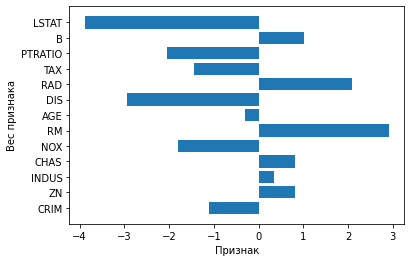

In [88]:
#рассмотрим вклад признаков в модель
coef1 = model.coef_
print(pd.Series(coef1[0], index = feat_nm).agg('abs').sort_values().agg('abs'))
plt.barh(feat_nm, coef1.flatten())

plt.ylabel("Вес признака")
plt.xlabel("Признак")

plt.show()

In [89]:
#уберем часть признаков и посмотрим на качество обучение. 
#После будем менять предел филтрации признаков и смотреть, в каком случае ошибка меньше
#В результате выясним, что наименьшая ошиька при приедел, убирабщем два наименьших признака(AGE и INDUS)
imp_feats = [feat for feat, wght in zip(feat_nm, coef1.flatten()) if np.abs(wght) > 0.8]
display(len(feat_nm) -len(imp_feats))

2

In [90]:
dic_3 = form_model(X_train_sc, y_train, X_test_sc, y_test, imp_feats, model)
err_3 = dic_3['err']

print(err_2)
print(err_3)

{'mse': 21.517444231177198, 'mae': 3.1627098714574036, 'r2': 0.669370269149559}
{'mse': 21.243390345509408, 'mae': 3.1137872898863717, 'r2': 0.6692308724895277}


In [91]:
imp_feats = [feat for feat, wght in zip(feat_nm, coef1.flatten()) if np.abs(wght) > 0.81]
display(len(feat_nm) -len(imp_feats))

3

In [92]:
dic_1 = form_model(X_train_sc, y_train, X_test_sc, y_test, imp_feats, model)
err_1 = dic_1['err']

print(err_2)
print(err_3)
print(err_1)

{'mse': 21.517444231177198, 'mae': 3.1627098714574036, 'r2': 0.669370269149559}
{'mse': 21.243390345509408, 'mae': 3.1137872898863717, 'r2': 0.6692308724895277}
{'mse': 22.242133789839116, 'mae': 3.1968689403058326, 'r2': 0.6416997567033819}


In [93]:
imp_feats = [feat for feat, wght in zip(feat_nm, coef1.flatten()) if np.abs(wght) > 0.3]
display(len(feat_nm) -len(imp_feats))

1

In [94]:
dic_1 = form_model(X_train_sc, y_train, X_test_sc, y_test, imp_feats, model)
err_1 = dic_1['err']

print(err_2)
print(err_3)
print(err_1)
#запишем ошибки в файл, для дальнейших заданий
pd.DataFrame([err_3]).to_pickle('errors_line.pkl')

{'mse': 21.517444231177198, 'mae': 3.1627098714574036, 'r2': 0.669370269149559}
{'mse': 21.243390345509408, 'mae': 3.1137872898863717, 'r2': 0.6692308724895277}
{'mse': 21.32060413611495, 'mae': 3.129113375043146, 'r2': 0.6695613724351879}


Задание 2
Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.
Сделайте агрумент n_estimators равным 1000,
max_depth должен быть равен 12 и random_state сделайте равным 42.
Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression,
но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],
чтобы получить из датафрейма одномерный массив Numpy,
так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.
Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.
Напишите в комментариях к коду, какая модель в данном случае работает лучше.